In [5]:
pip install scikit-learn==1.3.2

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import stopwords
from string import punctuation
import re
import unidecode
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
# import spacy
# import gensim
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score,accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [9]:
data = pd.read_csv(r"\Users\dhine\OneDrive\Desktop\Raghul\fake_job_postings.csv")

In [10]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [11]:
data['title'].value_counts()

English Teacher Abroad                                         311
Customer Service Associate                                     146
Graduates: English Teacher Abroad (Conversational)             144
English Teacher Abroad                                          95
Software Engineer                                               86
                                                              ... 
West Coast Regional Channel Manager (RCM)                        1
BI Practice Manager                                              1
Community Coordinator- Ambassador Programme                      1
Senior Traffic Engineer                                          1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 11231, dtype: int64

In [12]:
print(data.dtypes)

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object


In [13]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

Dropping the columns with high null values

In [14]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [15]:
categories=['telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education','industry','function','fraudulent']

In [16]:
for i in categories:
     x=data[i].value_counts()
     print (x.to_frame())

   telecommuting
0          17113
1            767
   has_company_logo
1             14220
0              3660
   has_questions
0           9088
1           8792
           employment_type
Full-time            11620
Contract              1524
Part-time              797
Temporary              241
Other                  227
                  required_experience
Mid-Senior level                 3809
Entry level                      2697
Associate                        2297
Not Applicable                   1116
Director                          389
Internship                        381
Executive                         141
                                   required_education
Bachelor's Degree                                5145
High School or equivalent                        2080
Unspecified                                      1397
Master's Degree                                   416
Associate Degree                                  274
Certification                                   

### Stopwords removal

In [17]:
def lower_case_convertion(text):
    lower_text = text.lower()
    return lower_text

In [18]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation))

In [19]:
def remove_extra_spaces(text):
    space_pattern = r'\s+'
    without_space = re.sub(pattern=space_pattern, repl=" ", string=text)
    return without_space

In [20]:
def remove_single_char(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

In [21]:
def accented_to_ascii(text):
    text = unidecode.unidecode(text)
    return text

In [22]:
def remove_html_tags(text):
    html_pattern = r'<.*?>'
    without_html = re.sub(pattern=html_pattern, repl=' ', string=text)
    return without_html

In [23]:
def remove_stopwords(text):

    text_without_sw = []
    text_tokens = word_tokenize(text)
    for word in text_tokens:
        # checking word is stopword or not
        if word not in all_stopwords:
            text_without_sw.append(word)

    # joining all tokens after removing stop words
    without_sw = ' '.join(text_without_sw)
    return without_sw

In [24]:
text=['title','benefits','company_profile','location','description','requirements','fraudulent']

categ=['employment_type','required_experience','required_education','industry','function','telecommuting','has_company_logo','has_questions','fraudulent']

In [25]:
categ_cols=data[categ].fillna('None')
categ_cols

,employment_type,required_experience,required_education,industry,function,telecommuting,has_company_logo,has_questions,fraudulent
0,Other,Internship,None,None,Marketing,0,1,0,0
1,Full-time,Not Applicable,None,Marketing and Advertising,Customer Service,0,1,0,0
2,None,None,None,None,None,0,1,0,0
3,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,1,0,0
4,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,1,1,0
...,...,...,...,...,...,...,...,...,...
17875,Full-time,Mid-Senior level,None,Computer Software,Sales,0,1,1,0
17876,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,1,1,0
17877,Full-time,None,None,None,None,0,0,0,0
17878,Contract,Not Applicable,Professional,Graphic Design,Design,0,0,1,0


In [26]:
txt_cols=data[text].fillna(' ')
txt_cols

,title,benefits,company_profile,location,description,requirements,fraudulent
0,Marketing Intern,,"We're Food52, and we've created a groundbreaki...","US, NY, New York","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0
1,Customer Service - Cloud Video Production,What you will get from usThrough being part of...,"90 Seconds, the worlds Cloud Video Production ...","NZ, , Auckland",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0
2,Commissioning Machinery Assistant (CMA),,Valor Services provides Workforce Solutions th...,"US, IA, Wever","Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0
3,Account Executive - Washington DC,Our culture is anything but corporate—we have ...,Our passion for improving quality of life thro...,"US, DC, Washington",THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0
4,Bill Review Manager,Full Benefits Offered,SpotSource Solutions LLC is a Global Human Cap...,"US, FL, Fort Worth",JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0
...,...,...,...,...,...,...,...
17875,Account Director - Distribution,What can you expect from us?We have an open cu...,Vend is looking for some awesome new talent to...,"CA, ON, Toronto",Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,0
17876,Payroll Accountant,Health &amp; WellnessMedical planPrescription ...,WebLinc is the e-commerce platform and service...,"US, PA, Philadelphia",The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,0
17877,Project Cost Control Staff Engineer - Cost Con...,,We Provide Full Time Permanent Positions for m...,"US, TX, Houston",Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,0
17878,Graphic Designer,Competitive salary (compensation will be based...,,"NG, LA, Lagos",Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,0


In [27]:
data=txt_cols.join(categ_cols.drop(columns='fraudulent'))

In [28]:
data['text']=data['title'] +' '+data['benefits']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']
colm=['title','benefits','company_profile','description','requirements']
data.drop(columns=colm,inplace=True)

In [29]:
data['text']= data['text'].apply(lower_case_convertion)
data['text']= data['text'].apply(remove_punctuation)
data['text'] = data['text'].apply(remove_extra_spaces)
data['text'] = data['text'].apply(remove_single_char)
data['text'] = data['text'].apply(accented_to_ascii)
data['text'] = data['text'].apply(remove_html_tags)
data['text'].head()

0    marketing intern were food52 and weve created ...
1    customer service cloud video production what y...
2    commissioning machinery assistant cma valor se...
3    account executive washington dc our culture is...
4    bill review manager full benefits offered spot...
Name: text, dtype: object

## Exploratory Data Analysis (EDA)

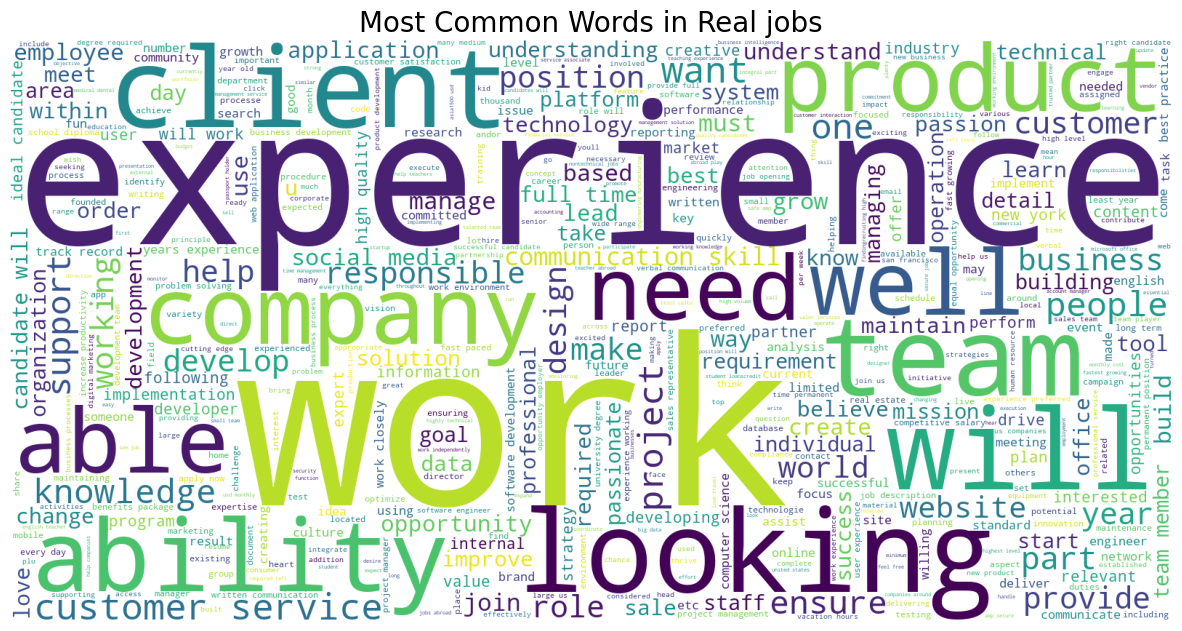

In [30]:
plt.figure(figsize = (15,10)) 
wordcloud_real = WordCloud(width = 1600 , height = 800 , max_words = 500,background_color='white').generate(" ".join(data[data['fraudulent'] == 0]['text']))
plt.axis('off')
plt.title('Most Common Words in Real jobs',size=20)
plt.imshow(wordcloud_real)

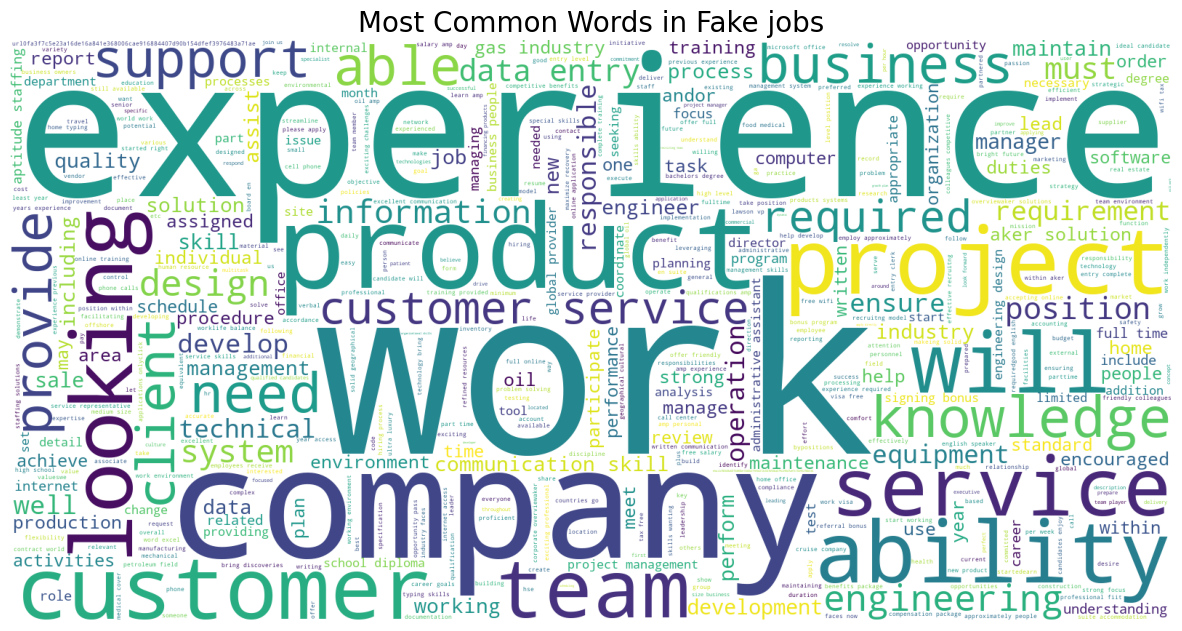

In [31]:
plt.figure(figsize = (15,10)) 
wordcloud_fake = WordCloud(width = 1600 , height = 800 , max_words = 500,background_color='white').generate(" ".join(data[data['fraudulent'] == 1]['text']))
plt.axis('off')
plt.title('Most Common Words in Fake jobs',size=20)
plt.imshow(wordcloud_fake)

In [32]:
categ_cols['country']=txt_cols['location'].apply(lambda x:x.split(',')[0])
countries=categ_cols['country'].value_counts().to_frame()
countries

,country
US,10656
GB,2384
GR,940
CA,457
DE,383
...,...
SI,1
CO,1
SD,1
UG,1


In [33]:
data['fraudulent'].value_counts().to_frame()

,fraudulent
0,17014
1,866


([<matplotlib.patches.Wedge at 0x241c9c36a90>,
 [Text(-1.0872905906487755, 0.16673083544034975, 'Real Job'),
  Text(1.0872905828435406, -0.16673088634009564, 'Fake Job')],
 [Text(-0.593067594899332, 0.09094409205837257, '95%'),
  Text(0.5930675906419312, -0.09094411982187034, '5%')])

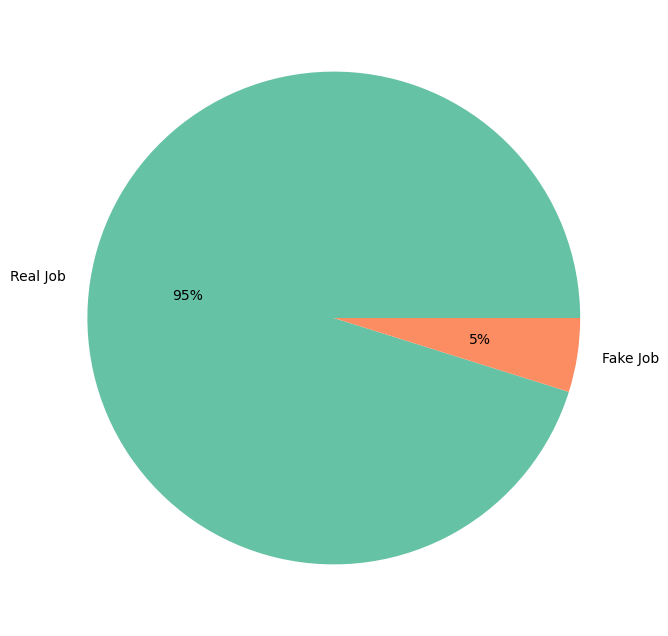

In [34]:
colors = sns.color_palette('Set2')[0:10]
labels=['Real Job','Fake Job']
plt.figure(figsize=(10,8))
plt.pie(data['fraudulent'].value_counts(),labels=labels,colors=colors,autopct='%.0f%%')

In [35]:
fakejobs=categ_cols[categ_cols['fraudulent']==1]
realjobs=categ_cols[categ_cols['fraudulent']==0]

C:\Users\dhine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dhine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dhine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dhine\anaconda3\lib\si

Text(0.5, 0, 'Function')

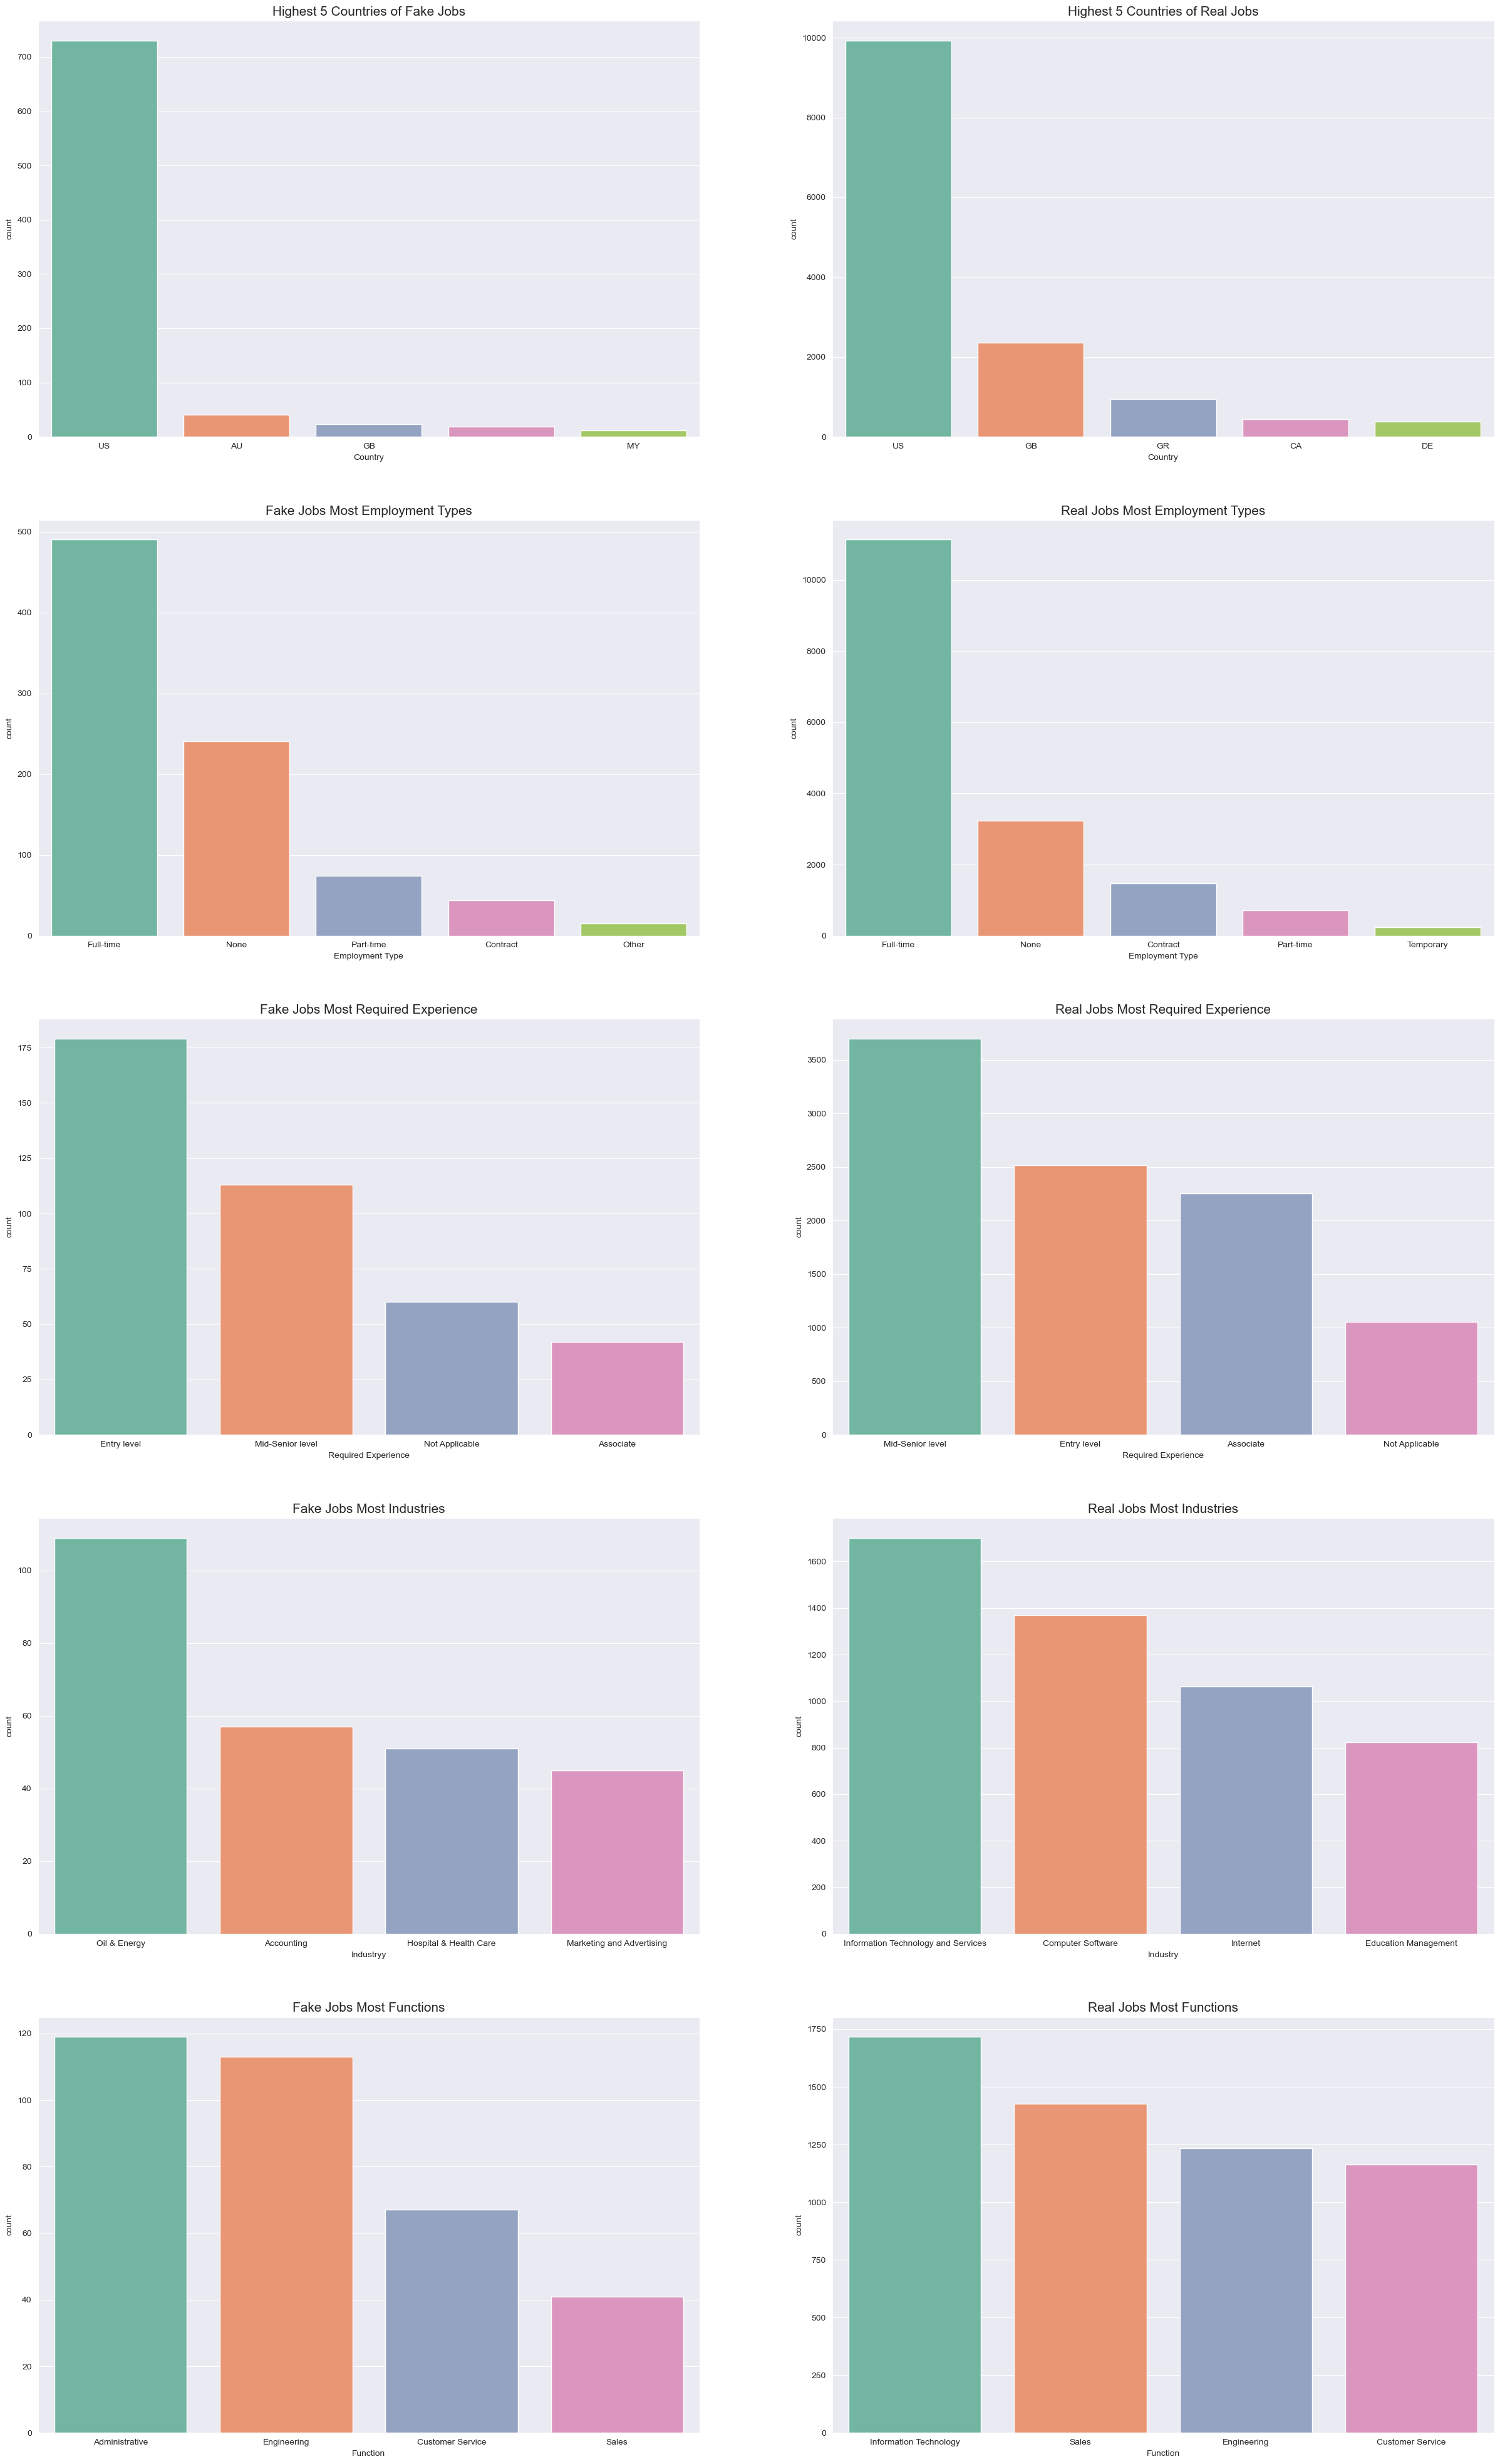

In [36]:
sns.set_style('darkgrid')
fig,axes=plt.subplots(5,2,figsize=(30,50))
sns.countplot(fakejobs['country'],palette='Set2',order = fakejobs['country'].value_counts()[:5].index,ax=axes[0,0])
sns.countplot(realjobs['country'],palette='Set2',order = realjobs['country'].value_counts()[:5].index,ax=axes[0,1])
axes[0,0].set_title('Highest 5 Countries of Fake Jobs',fontsize=15)
axes[0,1].set_title('Highest 5 Countries of Real Jobs',fontsize=15)
axes[0,0].set_xlabel('Country')
axes[0,1].set_xlabel('Country')

sns.countplot(fakejobs['employment_type'],palette='Set2',order = fakejobs['employment_type'].value_counts()[:5].index,ax=axes[1,0])
sns.countplot(realjobs['employment_type'],palette='Set2',order = realjobs['employment_type'].value_counts()[:5].index,ax=axes[1,1])
axes[1,0].set_title('Fake Jobs Most Employment Types',fontsize=15)
axes[1,1].set_title('Real Jobs Most Employment Types',fontsize=15)
axes[1,0].set_xlabel('Employment Type')
axes[1,1].set_xlabel('Employment Type')


sns.countplot(fakejobs['required_experience'],palette='Set2',order = fakejobs['required_experience'].value_counts()[1:5].index,ax=axes[2,0])
sns.countplot(realjobs['required_experience'],palette='Set2',order = realjobs['required_experience'].value_counts()[1:5].index,ax=axes[2,1])
axes[2,0].set_title('Fake Jobs Most Required Experience',fontsize=15)
axes[2,1].set_title('Real Jobs Most Required Experience',fontsize=15)
axes[2,0].set_xlabel('Required Experience')
axes[2,1].set_xlabel('Required Experience')

sns.countplot(fakejobs['industry'],palette='Set2',order = fakejobs['industry'].value_counts()[1:5].index,ax=axes[3,0])
sns.countplot(realjobs['industry'],palette='Set2',order = realjobs['industry'].value_counts()[1:5].index,ax=axes[3,1])
axes[3,0].set_title('Fake Jobs Most Industries',fontsize=15)
axes[3,1].set_title('Real Jobs Most Industries',fontsize=15)
axes[3,0].set_xlabel('Industryy')
axes[3,1].set_xlabel('Industry')

sns.countplot(fakejobs['function'],palette='Set2',order = fakejobs['function'].value_counts()[1:5].index,ax=axes[4,0])
sns.countplot(realjobs['function'],palette='Set2',order = realjobs['function'].value_counts()[1:5].index,ax=axes[4,1])
axes[4,0].set_title('Fake Jobs Most Functions',fontsize=15)
axes[4,1].set_title('Real Jobs Most Functions',fontsize=15)
axes[4,0].set_xlabel('Function')
axes[4,1].set_xlabel('Function')

Text(0.5, 0, '')

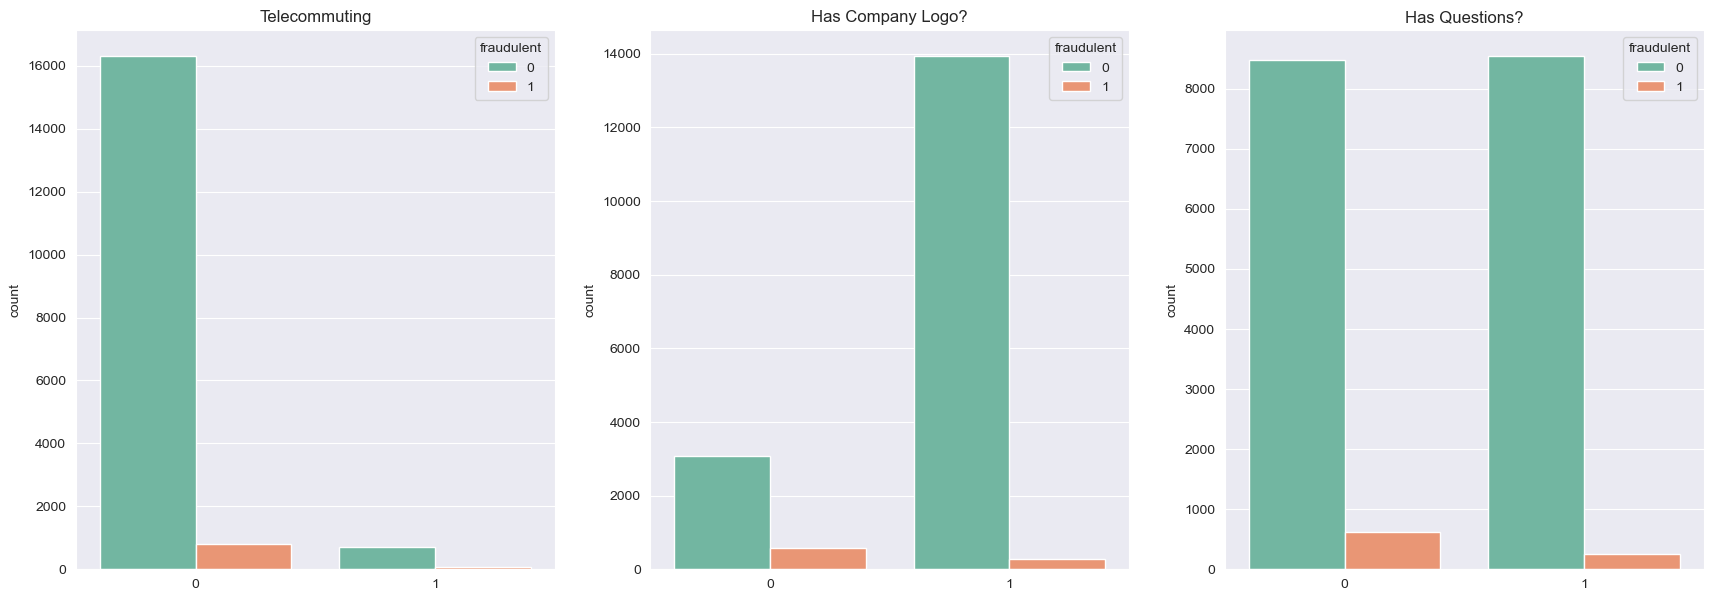

In [37]:
fig,axes=plt.subplots(1,3,figsize=(21,7))
sns.countplot(x='telecommuting', data=categ_cols, hue='fraudulent', palette='Set2',ax=axes[0]) 
sns.countplot(x='has_company_logo', data=categ_cols, hue='fraudulent', palette='Set2',ax=axes[1]) 
sns.countplot(x='has_questions', data=categ_cols, hue='fraudulent', palette='Set2',ax=axes[2]) 

axes[0].set_title('Telecommuting',fontsize=12)
axes[1].set_title('Has Company Logo?',fontsize=12)
axes[2].set_title('Has Questions?',fontsize=12)

axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')

In [38]:
def column_clean(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z\s*]','',text)
    text=text.split()
    return (text)

In [39]:
txt_fraud=txt_cols[txt_cols['fraudulent']==1]
txt_not_fraud=txt_cols[txt_cols['fraudulent']==0]

In [40]:
txt_fraud['title']=txt_fraud['title'].apply(column_clean)
txt_not_fraud['title']=txt_not_fraud['title'].apply(column_clean)

C:\Users\dhine\AppData\Local\Temp\ipykernel_11704\2533210019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txt_fraud['title']=txt_fraud['title'].apply(column_clean)
C:\Users\dhine\AppData\Local\Temp\ipykernel_11704\2533210019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txt_not_fraud['title']=txt_not_fraud['title'].apply(column_clean)


In [41]:
def combine(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

fraud_titles = txt_fraud['title'].apply(combine)
not_fraud_titles = txt_not_fraud['title'].apply(combine)

In [42]:
fraud_titles

98                                ice technician
144                                  forward cap
173               technician instrument controls
180                              sales executive
215                       ice technician mt poso
                          ...                   
17827    student positions parttime and fulltime
17828                            sales associate
17829                          android developer
17830                              payroll clerk
17831                            furniture mover
Name: title, Length: 866, dtype: object

In [43]:
not_fraud_titles

0                                         marketing intern
1                  customer service cloud video production
2                    commissioning machinery assistant cma
3                          account executive washington dc
4                                      bill review manager
                               ...                        
17875                        account director distribution
17876                                   payroll accountant
17877    project cost control staff engineer cost contr...
17878                                     graphic designer
17879                           web application developers
Name: title, Length: 17014, dtype: object

In [44]:
fraud_titles_corpus=fraud_titles.values.tolist()
not_fraud_titles_corpus=not_fraud_titles.values.tolist()
# Corpus for WordCloud
fraud_titles_corpus=' '.join(fraud_titles_corpus)
not_fraud_titles_corpus=' '.join(not_fraud_titles_corpus)

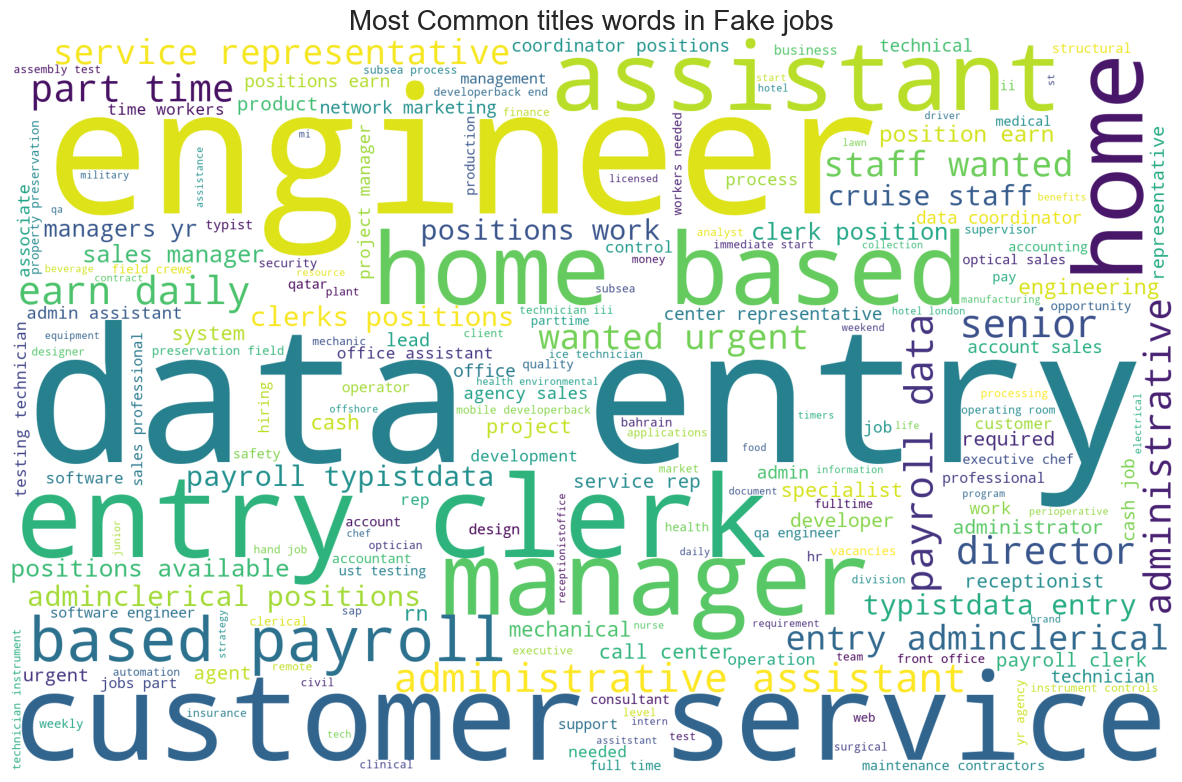

In [45]:
plt.figure(figsize=(15,10))
wordcloudfraud=WordCloud(width = 1900 , height = 1200 , background_color='white').generate(fraud_titles_corpus)
plt.axis('off')
plt.title('Most Common titles words in Fake jobs',size=20)
plt.imshow(wordcloudfraud)

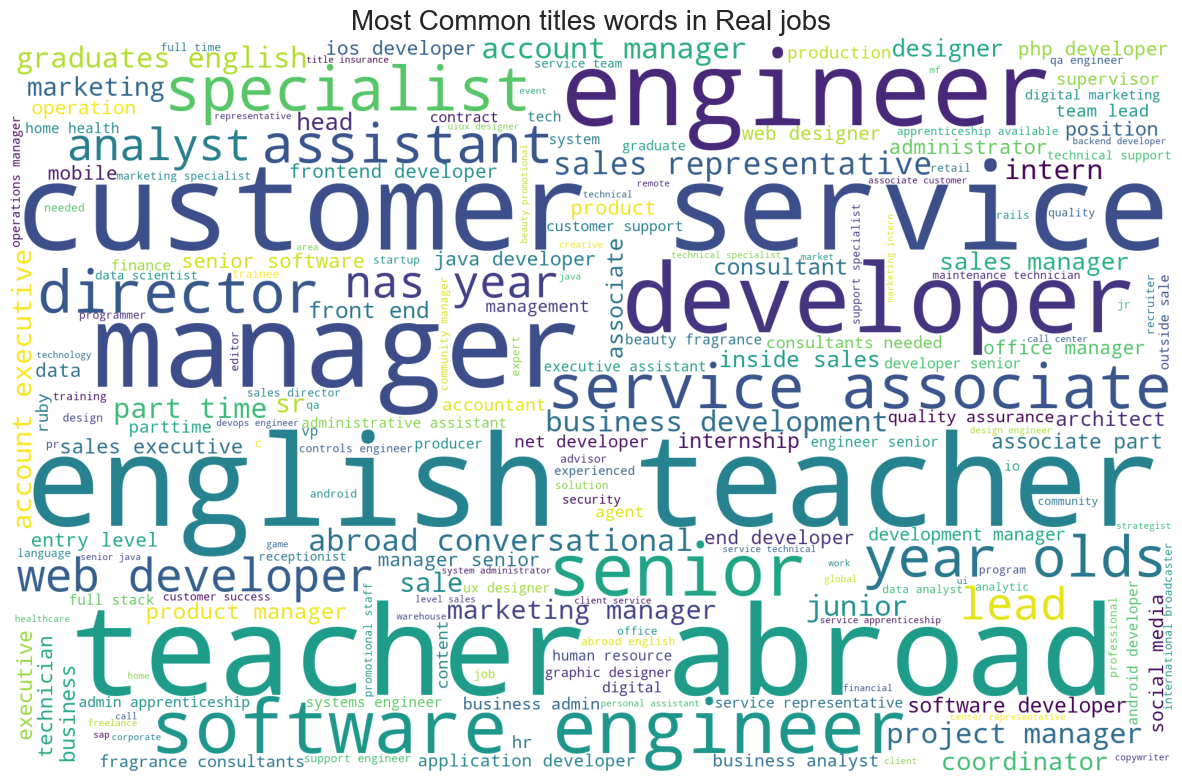

In [46]:
plt.figure(figsize=(15,10))
wordcloudnotfraud=WordCloud(width = 1900 , height = 1200,background_color='white').generate(not_fraud_titles_corpus)
plt.axis('off')
plt.title('Most Common titles words in Real jobs',size=20)
plt.imshow(wordcloudnotfraud)

## Model Building

In [47]:
x=data.drop(columns='fraudulent')
y=data['fraudulent']

In [48]:
data.head()


,location,fraudulent,employment_type,required_experience,required_education,industry,function,telecommuting,has_company_logo,has_questions,text
0,"US, NY, New York",0,Other,Internship,None,None,Marketing,0,1,0,marketing intern were food52 and weve created ...
1,"NZ, , Auckland",0,Full-time,Not Applicable,None,Marketing and Advertising,Customer Service,0,1,0,customer service cloud video production what y...
2,"US, IA, Wever",0,None,None,None,None,None,0,1,0,commissioning machinery assistant cma valor se...
3,"US, DC, Washington",0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,1,0,account executive washington dc our culture is...
4,"US, FL, Fort Worth",0,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,1,1,bill review manager full benefits offered spot...


In [49]:
# Applying Count Vectorizer
count_vec = CountVectorizer(max_features=5000)
vec = count_vec.fit_transform(data['text'])

In [50]:
text=pd.DataFrame(vec.toarray(),columns=count_vec.get_feature_names_out())
labels=pd.get_dummies(x.drop(columns='text'))
result = pd.concat([labels, text], axis=1)

In [51]:
# Splitting data to train and test
x_train,x_test,y_train,y_test=train_test_split(result,y,test_size=0.2,random_state=42,stratify=y)

In [52]:
# Naive Bayes
nb=MultinomialNB()
nb.fit(x_train,y_train)
nb_y_pred=nb.predict(x_test)

In [53]:
print('Training Classification report for Naive Bayes \n',classification_report(y_train,nb.predict(x_train)))
print('Testing Classification Report for Naive Bayes \n',classification_report(y_test,nb_y_pred))


Training Classification report for Naive Bayes 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96     13611
           1       0.38      0.90      0.54       693

    accuracy                           0.93     14304
   macro avg       0.69      0.91      0.75     14304
weighted avg       0.96      0.93      0.94     14304

Testing Classification Report for Naive Bayes 
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      3403
           1       0.40      0.87      0.55       173

    accuracy                           0.93      3576
   macro avg       0.70      0.90      0.76      3576
weighted avg       0.96      0.93      0.94      3576



In [54]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_y_pred=lr.predict(x_test)

C:\Users\dhine\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
print('Training Classification report for Logistic Regression \n',classification_report(y_train,lr.predict(x_train)))
print('Testing Classification Report for Logistion Regression \n',classification_report(y_test,lr_y_pred))


Training Classification report for Logistic Regression 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      1.00      1.00       693

    accuracy                           1.00     14304
   macro avg       1.00      1.00      1.00     14304
weighted avg       1.00      1.00      1.00     14304

Testing Classification Report for Logistion Regression 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3403
           1       0.92      0.77      0.84       173

    accuracy                           0.99      3576
   macro avg       0.96      0.88      0.92      3576
weighted avg       0.99      0.99      0.99      3576



In [56]:
# DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_y_pred=dt.predict(x_test)

In [57]:
print('        Training Classification report for Decision Tree Classifier \n',classification_report(y_train,dt.predict(x_train)))
print('        Testing Classification Report for Decision Tree Classifier \n',classification_report(y_test,dt_y_pred))

        Training Classification report for Decision Tree Classifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      1.00      1.00       693

    accuracy                           1.00     14304
   macro avg       1.00      1.00      1.00     14304
weighted avg       1.00      1.00      1.00     14304

        Testing Classification Report for Decision Tree Classifier 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.82      0.79      0.80       173

    accuracy                           0.98      3576
   macro avg       0.90      0.89      0.90      3576
weighted avg       0.98      0.98      0.98      3576



In [58]:
# RandomForest
rf=RandomForestClassifier(n_estimators=50)
rf.fit(x_train,y_train)
rf_y_pred=rf.predict(x_test)

In [59]:
print('        Training Classification report for Random Tree Classifier \n',classification_report(y_train,rf.predict(x_train)))
print('        Testing Classification Report for Random Tree Classifier \n',classification_report(y_test,rf_y_pred))

        Training Classification report for Random Tree Classifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      1.00      1.00       693

    accuracy                           1.00     14304
   macro avg       1.00      1.00      1.00     14304
weighted avg       1.00      1.00      1.00     14304

        Testing Classification Report for Random Tree Classifier 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       1.00      0.59      0.74       173

    accuracy                           0.98      3576
   macro avg       0.99      0.79      0.87      3576
weighted avg       0.98      0.98      0.98      3576



In [60]:
import pickle
Pkl_Filename = "job.pkl"  
pickle.dump(rf, open(Pkl_Filename, 'wb'))

In [61]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)
Pickled_LR_Model


RandomForestClassifier(n_estimators=50)